In [1]:
from datasets import load_dataset

ds = load_dataset("HuggingFaceFW/finetranslations", "abk_Cyrl")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/7149 [00:00<?, ?it/s]

data/abk_Cyrl/000_00000.parquet:   0%|          | 0.00/35.5M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [2]:
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'translated_text', 'translated_chunks', 'og_chunks', 'og_full_text', 'og_language', 'og_language_score', 'og_token_count', 'og_quality_score', 'early_stop', 'url', 'warc_path', 'minhash_cluster_size', 'translated_token_count', 'edu_score_raw', 'edu_score'],
        num_rows: 2670
    })
})

In [3]:
import pandas as pd

df = pd.read_json("hf://datasets/xiuhuywh/DRIM-VisualReasonHard/train.json")

df

,images,doc_id,problem,solution,data_source
0,[VisualReansonHard/data/visual_reanson_hr_71.jpg],visual_reanson_hr_71,<image>\nWhat symbol is featured on the warrio...,A heart,visual_reanson_hr
1,[VisualReansonHard/data/visual_reanson_hr_5.jpg],visual_reanson_hr_5,<image>\nWhat are the two colors of the curved...,Red and green,visual_reanson_hr
2,[VisualReansonHard/data/visual_reanson_hr_70.jpg],visual_reanson_hr_70,<image>\nIn the decorative bird artwork within...,Black spots,visual_reanson_hr
3,[VisualReansonHard/data/visual_reanson_hr_47.jpg],visual_reanson_hr_47,<image>\nIn the U-Net refine network’s DownBlo...,2,visual_reanson_hr
4,[VisualReansonHard/data/visual_reanson_hr_39.jpg],visual_reanson_hr_39,<image>\nWhat is the third large red Chinese c...,理,visual_reanson_hr
...,...,...,...,...,...
17131,[VisualReansonHard/data/visual_reanson_hr_1690...,visual_reanson_hr_16903,<image>\nWhat name is written on the side of t...,HEIDELBERG,visual_reanson_hr
17132,[VisualReansonHard/data/visual_reanson_hr_1701...,visual_reanson_hr_17014,<image>\nWhat is the first word inscribed at t...,CORPVS,visual_reanson_hr
17133,[VisualReansonHard/data/visual_reanson_hr_1711...,visual_reanson_hr_17116,<image>\nWhat magnification value is indicated...,13500×,visual_reanson_hr
17134,[VisualReansonHard/data/visual_reanson_hr_1706...,visual_reanson_hr_17063,<image>\nWhat brand name is inscribed at the t...,GOURDIN,visual_reanson_hr


In [4]:
df.shape

(17136, 5)

# Task
Perform an exploratory data analysis on the DataFrame `df`, including checking for missing values and duplicates, displaying basic statistics and unique values, analyzing the length of text in the 'problem' and 'solution' columns, and visualizing the distributions of 'data_source' and text lengths.

## Check Missing Values

### Subtask:
Identify and count any missing values in each column of the DataFrame `df`.


In [13]:
df.isnull()

,images,doc_id,problem,solution,data_source,problem_length,solution_length
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
17131,False,False,False,False,False,False,False
17132,False,False,False,False,False,False,False
17133,False,False,False,False,False,False,False
17134,False,False,False,False,False,False,False


**Reasoning**:
To identify and count missing values in each column of the DataFrame `df`, I will use the `.isnull().sum()` method.



In [5]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
images         0
doc_id         0
problem        0
solution       0
data_source    0
dtype: int64


In [ ]:
a=9

## Check Duplicates

### Subtask:
Identify and count any duplicate rows in the DataFrame `df`.


**Reasoning**:
To identify and count duplicate rows, I will use the `.duplicated()` method on the DataFrame `df` and then sum the resulting boolean Series.



In [15]:
type(df)

pandas.core.frame.DataFrame

In [18]:
df['images']=df['images'].astype(str)

type(df['images'][0])

str

In [19]:
duplicate_rows_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_count}")

Number of duplicate rows: 0


In [22]:
def data_types(df):
    data_types = df.dtypes
    return data_types

In [21]:
result = data_types(df)
result

,0
images,object
doc_id,object
problem,object
solution,object
data_source,object
problem_length,int64
solution_length,int64


**Reasoning**:
The previous attempt to identify duplicate rows failed because the 'images' column contains lists, which are unhashable. To resolve this, I will convert the lists in the 'images' column to a string representation, making them hashable, and then re-run the duplicate check on the entire DataFrame.



In [23]:
df['images_str'] = df['images'].apply(lambda x: str(x))
duplicate_rows_count = df.duplicated(subset=[col for col in df.columns if col != 'images']).sum()
print(f"Number of duplicate rows: {duplicate_rows_count}")
del df['images_str'] # Remove the temporary column

Number of duplicate rows: 0


In [24]:
df.drop_duplicates()

,images,doc_id,problem,solution,data_source,problem_length,solution_length
0,['VisualReansonHard/data/visual_reanson_hr_71....,visual_reanson_hr_71,<image>\nWhat symbol is featured on the warrio...,A heart,visual_reanson_hr,61,7
1,['VisualReansonHard/data/visual_reanson_hr_5.j...,visual_reanson_hr_5,<image>\nWhat are the two colors of the curved...,Red and green,visual_reanson_hr,98,13
2,['VisualReansonHard/data/visual_reanson_hr_70....,visual_reanson_hr_70,<image>\nIn the decorative bird artwork within...,Black spots,visual_reanson_hr,114,11
3,['VisualReansonHard/data/visual_reanson_hr_47....,visual_reanson_hr_47,<image>\nIn the U-Net refine network’s DownBlo...,2,visual_reanson_hr,107,1
4,['VisualReansonHard/data/visual_reanson_hr_39....,visual_reanson_hr_39,<image>\nWhat is the third large red Chinese c...,理,visual_reanson_hr,76,1
...,...,...,...,...,...,...,...
17131,['VisualReansonHard/data/visual_reanson_hr_169...,visual_reanson_hr_16903,<image>\nWhat name is written on the side of t...,HEIDELBERG,visual_reanson_hr,84,10
17132,['VisualReansonHard/data/visual_reanson_hr_170...,visual_reanson_hr_17014,<image>\nWhat is the first word inscribed at t...,CORPVS,visual_reanson_hr,108,6
17133,['VisualReansonHard/data/visual_reanson_hr_171...,visual_reanson_hr_17116,<image>\nWhat magnification value is indicated...,13500×,visual_reanson_hr,75,6
17134,['VisualReansonHard/data/visual_reanson_hr_170...,visual_reanson_hr_17063,<image>\nWhat brand name is inscribed at the t...,GOURDIN,visual_reanson_hr,79,7


## Data Overview and Basic Statistics

### Subtask:
Display basic information about the DataFrame, including data types, non-null values, and descriptive statistics for numerical columns. Also, analyze unique values in categorical columns like 'data_source'.


**Reasoning**:
To display a concise summary of the DataFrame, including data types and non-null values, I will use the `.info()` method. Then, to get descriptive statistics for numerical columns, I'll use `.describe()`. Finally, I will analyze the unique values and their counts in the 'data_source' column using `.nunique()` and `.value_counts()` respectively.



In [25]:
df.describe()

,problem_length,solution_length
count,17136.000000,17136.000000
mean,107.634162,8.239379
std,23.101266,6.944820
min,7.000000,0.000000
25%,91.000000,4.000000
50%,106.000000,6.000000
75%,122.000000,11.000000
max,222.000000,85.000000


In [27]:
df['data_source'].value_counts()

,count
data_source,
visual_reanson_hr,17136


In [28]:
df['problem'].value_counts()

,count
problem,
<image>\nWhat year is inscribed in the artist’s signature on the painting?,7
<image>\nWhat is the surname of the artist as signed on the painting?,4
<image>\nWhat year is inscribed in the artist’s signature at the bottom of the painting?,4
<image>\nWhat year is inscribed next to the artist’s signature in the painting?,4
<image>\nWhat surname appears in the artist’s signature on the painting?,4
...,...
"<image>\nIn the crowd scene, what word is printed across the front of the light grey t-shirt worn by one individual?",1
<image>\nWhat surname appears in the watermark text overlaying the image?,1
<image>\nWhat are the dimensions in inches that are printed on the top right of the image?,1


In [8]:
print("DataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe(include='all'))

print("\nNumber of unique values in 'data_source':", df['data_source'].nunique())
print("\nUnique values and their counts in 'data_source':")
print(df['data_source'].value_counts())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17136 entries, 0 to 17135
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   images       17136 non-null  object
 1   doc_id       17136 non-null  object
 2   problem      17136 non-null  object
 3   solution     17136 non-null  object
 4   data_source  17136 non-null  object
dtypes: object(5)
memory usage: 669.5+ KB

Descriptive Statistics:
                                                   images  \
count                                               17136   
unique                                              17136   
top     [VisualReansonHard/data/visual_reanson_hr_1699...   
freq                                                    1   

                         doc_id  \
count                     17136   
unique                    17136   
top     visual_reanson_hr_16998   
freq                          1   

                                        

In [29]:
len("hello world")

11

## Analyze Text Lengths

### Subtask:
Calculate and analyze the length of the 'problem' and 'solution' strings to understand their distribution.


**Reasoning**:
To calculate the length of the 'problem' and 'solution' strings, I will create new columns named 'problem_length' and 'solution_length' by applying the `len()` function to the respective columns. Then, I will display descriptive statistics for these new length columns to understand their distribution.



In [30]:
df['problem_length'] = df['problem'].apply(len)
df['solution_length'] = df['solution'].apply(len)

print(df['problem_length'])

print("Descriptive statistics for 'problem_length':")
print(df['problem_length'].describe())

print("\nDescriptive statistics for 'solution_length':")
print(df['solution_length'].describe())

0         61
1         98
2        114
3        107
4         76
        ... 
17131     84
17132    108
17133     75
17134     79
17135    154
Name: problem_length, Length: 17136, dtype: int64
Descriptive statistics for 'problem_length':
count    17136.000000
mean       107.634162
std         23.101266
min          7.000000
25%         91.000000
50%        106.000000
75%        122.000000
max        222.000000
Name: problem_length, dtype: float64

Descriptive statistics for 'solution_length':
count    17136.000000
mean         8.239379
std          6.944820
min          0.000000
25%          4.000000
50%          6.000000
75%         11.000000
max         85.000000
Name: solution_length, dtype: float64


## Visualize Distributions

### Subtask:
Visualize the distribution of the 'data_source' column using a bar plot.

**Reasoning**:
To visualize the distribution of the 'data_source' column, I will use a bar plot from the `seaborn` library. This will provide a clear representation of the counts of each unique value in the 'data_source' column. I will also make sure to import `matplotlib.pyplot` for plot customization.



/tmp/ipython-input-2086744614.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='data_source', palette='viridis')


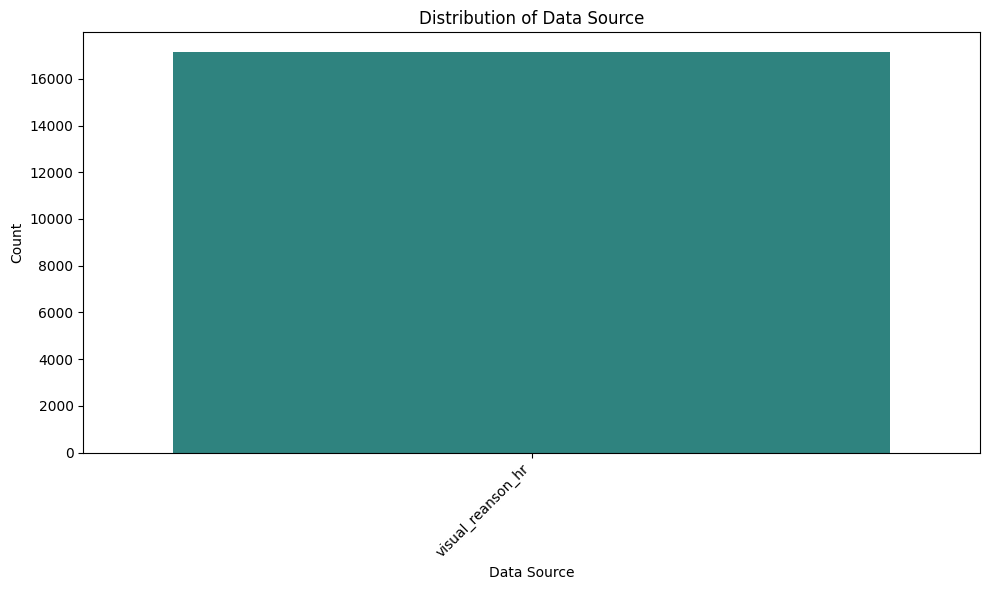

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='data_source', palette='viridis')
plt.title('Distribution of Data Source')
plt.xlabel('Data Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous `countplot` command generated a `FutureWarning` about the `palette` argument when `hue` is not assigned. To address this, I will explicitly assign `x='data_source'` to `hue='data_source'` and set `legend=False` in the `sns.countplot` function call.



### Subtask:
Visualize the distribution of 'problem_length' and 'solution_length' columns using histograms.

### Subtask:
Visualize the distribution of 'problem_length' and 'solution_length' columns using histograms.

**Reasoning**:
To visualize the distributions of 'problem_length' and 'solution_length', I will create two histograms using `seaborn.histplot`. I will display them in separate subplots to ensure clarity and proper labeling.



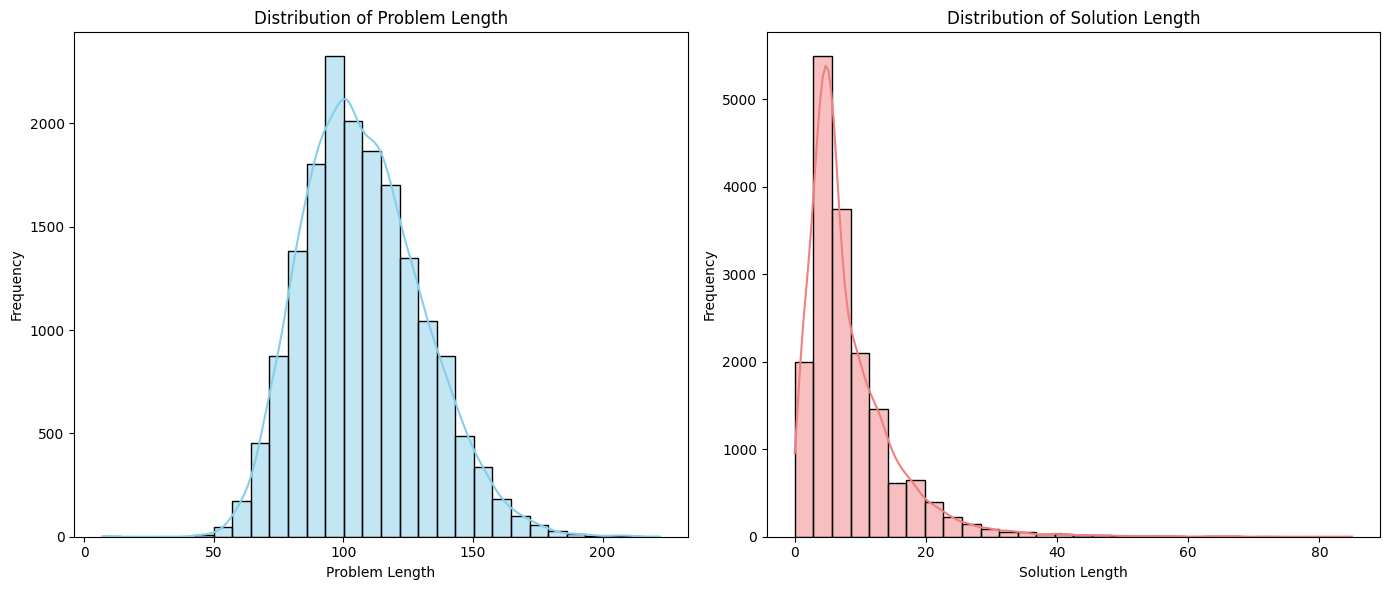

In [12]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['problem_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Problem Length')
plt.xlabel('Problem Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['solution_length'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Solution Length')
plt.xlabel('Solution Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the findings from the missing value check, duplicate check, data analysis, and visualizations, highlighting any significant insights.


## Summary:

### Data Analysis Key Findings

*   **Missing Values:** The dataset contains no missing values across any of its 5 columns.
*   **Duplicate Rows:** After handling an unhashable list type in the 'images' column by temporarily converting it to a string, no duplicate rows were found in the dataset.
*   **DataFrame Structure:** The DataFrame consists of 17136 entries and 5 columns ('images', 'doc\_id', 'problem', 'solution', 'data\_source'). All columns were identified as `object` data types.
*   **Unique Values:**
    *   'images' and 'doc\_id' columns have 17136 unique values each, suggesting each entry is distinct.
    *   The 'problem' column contains 17094 unique values out of 17136 entries, with the most frequent problem appearing 7 times.
    *   The 'solution' column has 9268 unique values, with one solution appearing 508 times.
*   **Data Source:** All 17136 entries originate from a single `data_source` called 'visual\_reanson\_hr'.
*   **Text Length Analysis:**
    *   **Problem Lengths:** The 'problem' descriptions have an average length of 107.63 characters (standard deviation: 23.10), ranging from a minimum of 7 to a maximum of 222 characters.
    *   **Solution Lengths:** The 'solution' texts are significantly shorter, with an average length of 8.24 characters (standard deviation: 6.94), ranging from 0 to 85 characters. Half of the solutions are 6 characters or less.
*   **Visualizations:**
    *   The distribution of 'data\_source' confirmed that all data points belong to the 'visual\_reanson\_hr' category.
    *   Histograms revealed that 'problem\_length' generally follows a relatively normal distribution, while 'solution\_length' is heavily skewed towards shorter lengths.

### Insights or Next Steps

*   Given the singular `data_source`, future data collection efforts could focus on diversifying data sources to enhance the model's robustness and generalization capabilities.
*   The significant difference in length distributions between 'problem' and 'solution' suggests that distinct text processing techniques or model architectures might be beneficial for each column when building a solution generation system.


In [1]:
import pandas as pd

data = pd.read_csv('/content/store_sales.csv')

data.head()

,date,store,sales,promo,holiday
0,2022-01-01,1,184.78,0,0
1,2022-01-02,1,192.62,0,0
2,2022-01-03,1,212.68,0,0
3,2022-01-04,1,249.58,1,0
4,2022-01-05,1,223.50,0,0


In [2]:
data.shape

(7300, 5)

In [3]:
data['store'].value_counts()

,count
store,
1,730
2,730
3,730
4,730
5,730
6,730
7,730
8,730
9,730


In [4]:
data.isna().sum()

,0
date,0
store,0
sales,0
promo,0
holiday,0


In [5]:
data.duplicated().sum()

np.int64(0)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

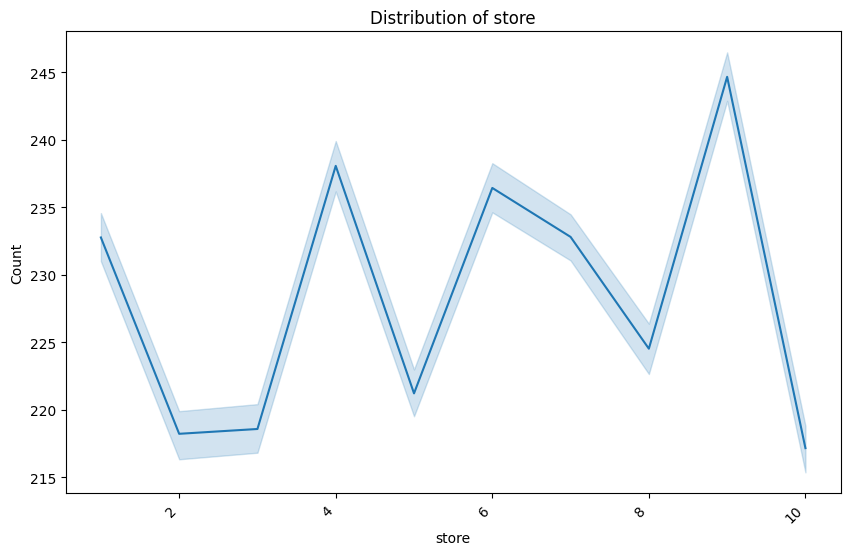

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data =data, x = 'store', y = 'sales')
plt.title('Distribution of store')
plt.xlabel('store')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt

In [12]:
data

,date,store,sales,promo,holiday
0,2022-01-01,1,184.78,0,0
1,2022-01-02,1,192.62,0,0
2,2022-01-03,1,212.68,0,0
3,2022-01-04,1,249.58,1,0
4,2022-01-05,1,223.50,0,0
...,...,...,...,...,...
7295,2023-12-27,10,242.08,0,0
7296,2023-12-28,10,235.35,0,0
7297,2023-12-29,10,222.82,0,0
7298,2023-12-30,10,236.04,1,0


In [16]:
data.drop(columns = ['promo'], inplace=True, axis=1)
data

,store,sales,holiday
0,1,184.78,0
1,1,192.62,0
2,1,212.68,0
3,1,249.58,0
4,1,223.50,0
...,...,...,...
7295,10,242.08,0
7296,10,235.35,0
7297,10,222.82,0
7298,10,236.04,0


In [17]:
data['updated_holiday']= data['holiday']+7
data

,store,sales,holiday,updated_holiday
0,1,184.78,0,7
1,1,192.62,0,7
2,1,212.68,0,7
3,1,249.58,0,7
4,1,223.50,0,7
...,...,...,...,...
7295,10,242.08,0,7
7296,10,235.35,0,7
7297,10,222.82,0,7
7298,10,236.04,0,7


In [18]:
data

,store,sales,holiday,updated_holiday
0,1,184.78,0,7
1,1,192.62,0,7
2,1,212.68,0,7
3,1,249.58,0,7
4,1,223.50,0,7
...,...,...,...,...
7295,10,242.08,0,7
7296,10,235.35,0,7
7297,10,222.82,0,7
7298,10,236.04,0,7


In [19]:
data.to_csv('result.csv')

In [21]:
!pip install scikit-learn

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

x = data.drop(columns = ['sales'])   # holiday, updated_holiday, stores
y = data['sales']  # label or dependent variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

x_train

,store,holiday,updated_holiday
4339,6,0,7
1412,2,0,7
5469,8,0,7
2781,4,0,7
4235,6,0,7
...,...,...,...
5191,8,0,7
5226,8,0,7
5390,8,1,8
860,2,0,7


In [23]:
y_train

,sales
4339,254.65
1412,241.59
5469,219.43
2781,243.52
4235,259.90
...,...
5191,255.10
5226,222.01
5390,231.73
860,246.22


In [24]:
y_test

,sales
733,201.97
4863,200.22
4614,264.63
3786,232.17
1669,194.55
...,...
2276,245.75
681,276.39
4529,211.30
6500,251.85


In [25]:
model = LinearRegression()  # build the model
model.fit(x_train, y_train)  # training the model on the train set

LinearRegression()

In [26]:
y_pred = model.predict(x_test)
y_pred

array([223.34687887, 224.95989582, 264.01728085, ..., 224.95989582,
       225.60510261, 223.66948226])

In [27]:
r2_score(y_test, y_pred)

0.20383836353578566

In [28]:
mean_squared_error(y_test, y_pred)

571.1466451203095

In [29]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

19.34020717124162